# 非線形分類問題 モーメンタム法

## データセットの作成

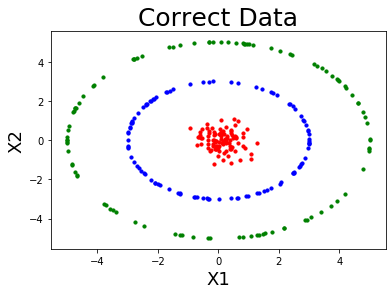

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#seed値
np.random.seed(1)

#色の定義
colors=("red","blue","green","gray","orange")

#X(入力データ)の作成
#↓サンプル数
num_of_sam = 100
#↓ガウシアンノイズの広がり具合
std_dv = 0.5
#↓中心データの生成
x_center = np.random.randn(num_of_sam,2)*std_dv
#↓環状データの生成
radius = 3
s = np.random.uniform(0,2*np.pi,num_of_sam)
x1 = np.sin(s)*radius
x2 = np.cos(s)*radius
x_circle = np.c_[x1,x2]
#環状データの生成2
radius = 5
s = np.random.uniform(0,2*np.pi,num_of_sam)
x1 = np.sin(s)*radius
x2 = np.cos(s)*radius
x_circle2 = np.c_[x1,x2]
#↓2つのグループを縦方向に連結しXとする
X = np.vstack((x_center,x_circle,x_circle2))

#T(正解データ)の作成
#↓グループ1の正解データを0とする
t_group1 = np.tile(0,(num_of_sam))
#↓グループ2の正解データを1とする
t_group2 = np.tile(1,(num_of_sam))
#↓グループ2の正解データを1とする
t_group3 = np.tile(2,(num_of_sam))
#↓グループを横方向に連結し1次元の正解データを作成
T_vector = np.hstack((t_group1,t_group2,t_group3))
#↓one-hot表現の正解データを作成
T = np.eye(len(np.unique(T_vector)))[T_vector]

#プロットを行う
#↓X,Tをもとに色付きの点をプロットする
for i in np.unique(T_vector):
    plt.scatter(x=X[T_vector==i,0],y=X[T_vector==i,1],s=10,c=colors[i])
plt.title("Correct Data",fontsize=25)
plt.xlabel("X1",fontsize=18)
plt.ylabel("X2",fontsize=18)
plt.show()

## 学習

In [2]:
#シグモイド関数の作成
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#ソフトマックス関数の作成
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

#クロスエントロピー誤差の関数を作成
def cross_entropy(Y,T):
    return -np.sum(T*np.log(Y+1e-7))

#隠れ層の数
dimention = 5

#重みを生成(初期値を平均0，分散1の乱数で生成)
W1 = np.random.randn(2,dimention)
W2 = np.random.randn(dimention,len(np.unique(T_vector)))

#バイアスを生成(初期値を平均0，分散1の乱数で生成)
B1 = np.random.randn(1,dimention)
B2 = np.random.randn(1,len(np.unique(T_vector)))

#速度の生成(初期値は0)
W1_vel = np.zeros_like(W1)
W2_vel = np.zeros_like(W2)
B1_vel = np.zeros_like(B1)
B2_vel = np.zeros_like(B2)

#慣性の強さ
alpha = 0.9

#学習率の設定
eta = 0.001
#イテレーション数の設定
iteration = 5000
#損失の推移保存リスト
E_save = np.array([])

#学習
for i in range(iteration):
    
    #--順伝番 Forward propagation--
    #↓出力の計算
    H = sigmoid(np.dot(X,W1)+B1)
    Y = softmax(np.dot(H,W2)+B2)
    
    #--逆伝番 Backward propagation--
    #↓損失の計算(クロスエントロピー誤差を用いる)
    E = cross_entropy(Y,T)
    #損失の保存
    E_save = np.append(E_save,E)
    #↓EをWで偏微分する
    dW2 = np.dot(H.T,Y-T)
    #↓EをBで偏微分する
    dB2 = np.sum(Y-T,axis=0,keepdims=True)
    #↓EをWで偏微分する
    dW1 = np.dot(X.T,H*(1-H)*np.dot(Y-T,W2.T))
    #↓EをBで偏微分する
    dB1 = np.sum(H*(1-H)*np.dot(Y-T,W2.T), axis=0, keepdims=True)
    #速度の保存
    W1_vel = -eta*dW1+alpha*W1_vel
    W2_vel = -eta*dW2+alpha*W2_vel
    B1_vel = -eta*dB1+alpha*B1_vel
    B2_vel = -eta*dB2+alpha*B2_vel
    #更新
    W1 = W1+W1_vel
    W2 = W2+W2_vel
    B1 = B1+B1_vel
    B2 = B2+B2_vel

## 学習結果のプロット

正答率は100.0%


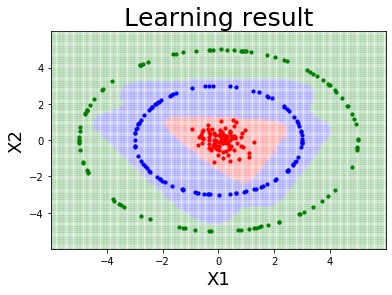

In [7]:
#グリッドの最小値と最大値の決定
#↓x1のmin値-1とmax値+1を保存する
x1_min = X[:,0].min()-1
x1_max = X[:,0].max()+1
#↓x2のmin値-1とmax値+1を保存する
x2_min = X[:,1].min()-1
x2_max = X[:,1].max()+1

#グリッドの細かさ指定
#↓x1方向に100刻み
x1_grid = np.linspace(x1_min,x1_max,100)
#↓x2方向に100刻み                    
x2_grid = np.linspace(x2_min,x2_max,100)

#グリッドをプロットするためのデータ生成
#↓xxにグリッドのx1データ，yyにグリッドのx2データを保存
xx,yy = np.meshgrid(x1_grid,x2_grid)

#xx,yyを二次配列にまとめる
#↓1列目がx1データ，2列目がx2データとなるようにまとめる
X_grid = np.c_[xx.reshape(-1),yy.reshape(-1)]

#学習結果を色で表現するためにデータを用意
#↓学習結果のyデータを生成
H_grid = sigmoid(np.dot(X_grid,W1)+B1)
Y_grid = softmax(np.dot(H_grid,W2)+B2)
H_data = sigmoid(np.dot(X,W1)+B1)
Y_data = softmax(np.dot(H_data,W2)+B2)

#↓学習結果のyデータを1次元にする
Y_grid_vector = np.argmax(Y_grid,axis=1)
Y_vector = np.argmax(Y_data,axis=1)

#正答率の表示
print("正答率は{0:.1f}%".format(np.sum(Y_vector==T_vector)/len(Y_vector)*100))

#プロットを行う
#↓正解データを点でプロット
for i in np.unique(T_vector):
    plt.scatter(x=X[T_vector==i,0],y=X[T_vector==i,1],s=10,c=colors[i])
#↓学習結果をグリッドでプロット
for i in np.unique(T_vector):
    plt.scatter(x=X_grid[Y_grid_vector==i,0],y=X_grid[Y_grid_vector==i,1],s=10,c=colors[i],alpha=0.1)
plt.title("Learning result",fontsize=25)
plt.xlabel("X1",fontsize=18)
plt.ylabel("X2",fontsize=18)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.show()

## 損失推移のプロット

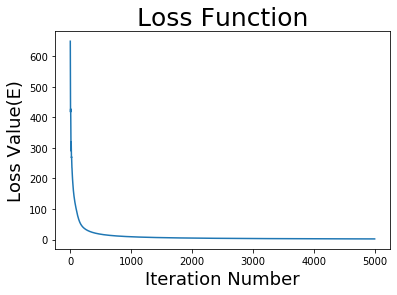

In [5]:
#プロットを行う
#↓損失とイテレーション数の関係を点でプロット
plt.plot(E_save)
plt.title("Loss Function",fontsize=25)
plt.xlabel("Iteration Number",fontsize=18)
plt.ylabel("Loss Value(E)",fontsize=18)
#plt.ylim(0,50)
plt.show()